<a href="https://colab.research.google.com/github/3sl18cs020/Project-clustering-moons/blob/main/Kalididdi_Jayarohit_Varma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [2]:
# Take make moons in built dataset

data_ = datasets.make_moons(200)

In [3]:
# check the dataset

data_

(array([[-6.30552667e-01,  7.76146464e-01],
        [ 2.54735550e-01, -1.66769001e-01],
        [ 1.00000000e+00,  0.00000000e+00],
        [ 1.29692038e+00, -4.54902241e-01],
        [ 1.99798668e+00,  4.36576080e-01],
        [ 1.92836793e+00,  1.28337544e-01],
        [-5.27225468e-01,  8.49725430e-01],
        [ 9.16108457e-01,  4.00930535e-01],
        [-8.88835449e-01,  4.58226522e-01],
        [ 1.98743889e+00,  3.41998604e-01],
        [-9.16108457e-01,  4.00930535e-01],
        [-2.35758936e-01,  9.71811568e-01],
        [ 1.88883545e+00,  4.17734783e-02],
        [-8.41253533e-01,  5.40640817e-01],
        [-1.73648178e-01,  9.84807753e-01],
        [ 1.70147489e+00, -2.12694171e-01],
        [ 4.75819158e-02,  9.98867339e-01],
        [ 8.57983413e-01,  5.13677392e-01],
        [ 1.14231484e+00, -4.89821442e-01],
        [ 6.13654874e-01, -4.22354294e-01],
        [ 1.60560969e+00, -2.95761841e-01],
        [ 1.78605309e+00, -1.18158986e-01],
        [ 1.82367658e+00, -6.705

In [4]:
# create input dataframe

inputData =pd.DataFrame(data=data_[0])

In [5]:
inputData.head()

,0,1
0,-0.630553,0.776146
1,0.254736,-0.166769
2,1.000000,0.000000
3,1.296920,-0.454902
4,1.997987,0.436576


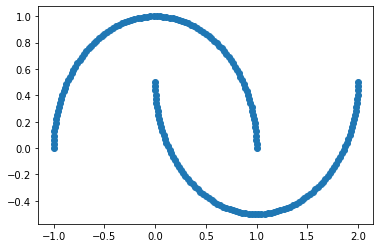

In [6]:
# create a scatter plot for inputData set
plt.scatter(inputData[0],inputData[1])

In [7]:
# create output dataframe

outputData = pd.DataFrame(data=data_[1])
outputData.head()

,0
0,0
1,1
2,0
3,1
4,1


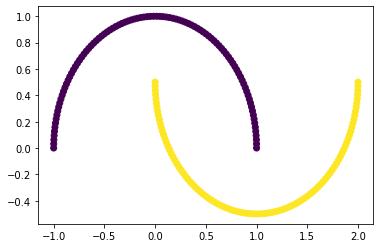

In [8]:
# create a scatter plot for outputData set
plt.scatter(inputData[0],inputData[1],c=outputData)



In [9]:
#call the  sklearn Kmeans and make a model with 200 samples
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5)
model.fit(inputData)
#model_fit

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# check for labels
model.labels_

array([1, 2, 0, 3, 3, 3, 1, 0, 1, 3, 1, 4, 3, 1, 4, 3, 4, 0, 2, 2, 3, 3,
       3, 3, 3, 4, 3, 1, 3, 2, 4, 0, 3, 2, 2, 2, 3, 4, 3, 3, 1, 1, 0, 0,
       3, 1, 3, 3, 2, 2, 0, 4, 2, 2, 4, 2, 0, 2, 0, 3, 4, 4, 0, 2, 0, 3,
       1, 2, 3, 3, 0, 1, 0, 4, 1, 1, 2, 1, 4, 2, 0, 3, 4, 2, 3, 0, 2, 1,
       2, 2, 2, 4, 4, 1, 4, 1, 0, 0, 4, 4, 1, 3, 3, 2, 3, 0, 0, 0, 1, 2,
       0, 0, 3, 2, 1, 4, 2, 1, 4, 4, 4, 3, 3, 3, 4, 0, 0, 4, 1, 2, 2, 4,
       1, 1, 4, 4, 0, 2, 3, 4, 4, 4, 4, 2, 0, 4, 1, 1, 2, 2, 3, 2, 3, 2,
       4, 2, 1, 3, 1, 3, 4, 1, 1, 0, 4, 4, 2, 4, 4, 3, 0, 4, 3, 3, 3, 2,
       3, 3, 1, 3, 1, 2, 2, 4, 4, 2, 0, 4, 2, 1, 2, 0, 0, 4, 1, 0, 4, 4,
       4, 2], dtype=int32)

In [11]:
from sklearn import metrics

In [12]:
# call metrics and check silhoutte score
metrics.silhouette_score(inputData,model.labels_)



0.4872097598491106

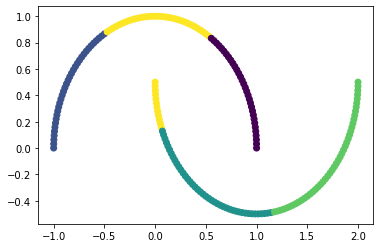

In [13]:
# create a scatter plot for inputData set with model labels color
plt.scatter(inputData[0],inputData[1],c=model.labels_)


#### finding right number of cluster

In [14]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

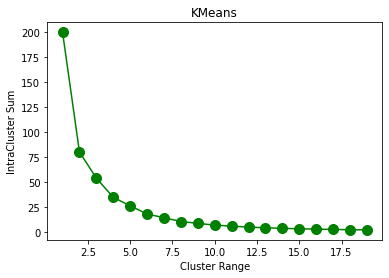

In [15]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()